# Desafio


Desafio proposto pela EBAC em conjunto com a Loggi

O Loggi Benchmark for Urban Deliveries (BUD) é um repositório do GitHub (https://github.com/loggi/loggibud/tree/master) com dados e códigos para problemas típicos que empresas de logística enfrentam: otimização das rotas de entrega, alocação de entregas nos veículos da frota com capacidade limitada, etc. Os dados são sintetizados de fontes públicas (IBGE, IPEA, etc.) e são representativos dos desafios que a startup enfrenta no dia a dia, especialmente com relação a sua escala.


**O desafio é posicionar centros de consolidação em toda a cidade e dividir a procura em veículos de entrega.**

**Esse exercício será feito levando em consideração as informações para o estado do Rio de Janeiro**

## Explorando os dados

### Organizando arquivos das pastas cvrp-instances e deliveries-instances em um único arquivo json

Abrindo arquivo de pasta zipada

In [ ]:
import zipfile

with zipfile.ZipFile('/content/dataset.zip', 'r') as zip:
    # Extraia todos os arquivos do arquivo ZIP para o diretório atual
    zip.extractall()

In [ ]:
import os
import json
from glob import glob

In [ ]:
# Lista para armazenar os dados de todos os arquivos JSON
all_data = []
file_names = []

# Função para ler e adicionar dados de arquivos JSON de uma pasta
def add_json_files_from_folder(folder_path):
    for file_name in glob(os.path.join(folder_path, '*.json')):
        with open(file_name, 'r') as file:
            data = json.load(file)
            all_data.append(data)
            file_names.append(file_name)

# Função para salvar todos os dados combinados em um único arquivo JSON
def salvar_arq (output_file):
  with open(output_file, 'w') as file:
      json.dump(all_data, file, indent=4)
  print(f'Todos os arquivos foram combinados em {output_file}')

  #Função para verificar se todos os arquivos foram salvos corretamente
def verificar():
  num_files_read = len(file_names)
  num_items_saved = len(all_data)

  print(f'Total de arquivos lidos: {num_files_read}')
  print(f'Total de itens salvos: {num_items_saved}')


Juntando os arquivos cvrp-instances-1.0


In [ ]:
# Caminhos para as pastas com os arquivos JSON
folder_path0 = '/content/data/cvrp-instances-1.0/dev/rj-0'
folder_path1 = '/content/data/cvrp-instances-1.0/dev/rj-1'
folder_path2 = '/content/data/cvrp-instances-1.0/dev/rj-2'
folder_path3 = '/content/data/cvrp-instances-1.0/dev/rj-3'
folder_path4 = '/content/data/cvrp-instances-1.0/dev/rj-4'
folder_path5  = '/content/data/cvrp-instances-1.0/dev/rj-5'

In [ ]:
# Adiciona dados de cada pasta
add_json_files_from_folder(folder_path0)
add_json_files_from_folder(folder_path1)
add_json_files_from_folder(folder_path2)
add_json_files_from_folder(folder_path3)
add_json_files_from_folder(folder_path4)
add_json_files_from_folder(folder_path5)

In [ ]:
#Salvar informações
salvar_arq("/content/cvrp.json")
verificar()

Todos os arquivos foram combinados em /content/cvrp.json
Total de arquivos lidos: 180
Total de itens salvos: 180


Juntando os arquivos delivery-instances-1.0

In [ ]:
# Caminhos para as pastas com os arquivos JSON
folder_path_dev = '/content/data/delivery-instances-1.0/dev/rj'

# Adiciona dados de cada pasta
add_json_files_from_folder(folder_path_dev)

#Salvar informações
salvar_arq("/content/deliveries.json")
verificar()

Todos os arquivos foram combinados em /content/deliveries.json
Total de arquivos lidos: 210
Total de itens salvos: 210


### Carregando dados do arquivo

In [ ]:
import json
import pandas as pd

In [ ]:
#Abrindo arquivo com Json
with open ('deliveries.json', mode="r", encoding="utf8") as file:
  data = json.load(file)

#Organizando arquivo com o pandas
data = pd.read_json("/content/deliveries.json")
data.head()

,name,region,origin,vehicle_capacity,deliveries,max_hubs
0,cvrp-0-rj-98,rj-0,"{'lng': -43.09887838388887, 'lat': -22.8662298...",180,"[{'id': '22908336421b02cee65b0a938bbeb5ef', 'p...",NaN
1,cvrp-0-rj-90,rj-0,"{'lng': -43.09887838388887, 'lat': -22.8662298...",180,"[{'id': '3c1c3242fbb7c6d27c5b0cf2a619a5d4', 'p...",NaN
2,cvrp-0-rj-99,rj-0,"{'lng': -43.09887838388887, 'lat': -22.8662298...",180,"[{'id': '8f7a6fdb834658747738f87ef67bce9', 'po...",NaN
3,cvrp-0-rj-101,rj-0,"{'lng': -43.09887838388887, 'lat': -22.8662298...",180,"[{'id': 'bee1081786ee72000372393259c652cb', 'p...",NaN
4,cvrp-0-rj-118,rj-0,"{'lng': -43.09887838388887, 'lat': -22.8662298...",180,"[{'id': '232f28ee8124e1cd5bf24bee8a1d2597', 'p...",NaN


Avaliando os dados de deliveries

In [ ]:
data.shape

(210, 6)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              210 non-null    object 
 1   region            210 non-null    object 
 2   origin            180 non-null    object 
 3   vehicle_capacity  210 non-null    int64  
 4   deliveries        210 non-null    object 
 5   max_hubs          30 non-null     float64
dtypes: float64(1), int64(1), object(4)
memory usage: 10.0+ KB


In [ ]:
#excluindo coluna max_hubs
data.drop(columns=['max_hubs'], inplace=True)
data.shape

(210, 5)

## Raspagem de dados

Separar dicionáro com latitude e longitude de cada hub em duas colunas

In [ ]:
origin_hub = pd.json_normalize(data['origin']).rename(columns={"lng": "hub_lng", "lat":"hub_lat"})
origin_hub.reset_index(drop=True, inplace=True)

#juntando o origin_hub com o dataframe original
new_data = pd.concat([data.drop(columns=["origin", "deliveries"]), origin_hub], axis=1)
new_data.head()

,name,region,vehicle_capacity,hub_lng,hub_lat
0,cvrp-0-rj-98,rj-0,180,-43.098878,-22.86623
1,cvrp-0-rj-90,rj-0,180,-43.098878,-22.86623
2,cvrp-0-rj-99,rj-0,180,-43.098878,-22.86623
3,cvrp-0-rj-101,rj-0,180,-43.098878,-22.86623
4,cvrp-0-rj-118,rj-0,180,-43.098878,-22.86623


Separando o dicionário com "id", "point" e "size" da entrega da coluna "deliveries".

In [ ]:
deliveries_exploded =data['deliveries'].explode()
deliveries_exploded

0      {'id': '22908336421b02cee65b0a938bbeb5ef', 'po...
0      {'id': '3d0744402b7b45c435cbaa9b2bb8f809', 'po...
0      {'id': 'c1e22605e759646965cc23ccc4ab7948', 'po...
0      {'id': 'e0751bd175df4e25d0949f27cee0cd85', 'po...
0      {'id': 'ce0f9d1e41cf223a635ceef16138f079', 'po...
                             ...                        
209    {'id': '11cb4be50409d1ab58786eb2969b6ff3', 'po...
209    {'id': '8aa038a0ab17279258cfe5fd7e332108', 'po...
209    {'id': 'e87a1f47aa145dce9ab82dbae517c0e4', 'po...
209    {'id': 'e834a23bb5fcfd05094082edca4e1225', 'po...
209    {'id': 'ec7d395bcc19eba66c97f47d9dbd5b1c', 'po...
Name: deliveries, Length: 1759938, dtype: object

Achatando o resultado

In [ ]:
deliveries = pd.concat([
  pd.DataFrame(deliveries_exploded.apply(lambda record: record["size"])).rename(columns={"deliveries": "delivery_size"}),
  pd.DataFrame(deliveries_exploded.apply(lambda record: record["point"]["lng"])).rename(columns={"deliveries": "delivery_lng"}),
  pd.DataFrame(deliveries_exploded.apply(lambda record: record["point"]["lat"])).rename(columns={"deliveries": "delivery_lat"}),
], axis= 1)
deliveries.head()

,delivery_size,delivery_lng,delivery_lat
0,5,-43.099982,-22.857868
0,3,-43.100387,-22.861934
0,4,-43.100464,-22.864664
0,10,-43.108876,-22.869876
0,1,-43.108248,-22.868919


Juntando os resultados em um novo dataframe

In [ ]:
dataframe = pd.merge(left=new_data, right=deliveries, how='right', left_index=True, right_index=True)
dataframe.reset_index(inplace=True, drop=True)
dataframe.head()

,name,region,vehicle_capacity,hub_lng,hub_lat,delivery_size,delivery_lng,delivery_lat
0,cvrp-0-rj-98,rj-0,180,-43.098878,-22.86623,5,-43.099982,-22.857868
1,cvrp-0-rj-98,rj-0,180,-43.098878,-22.86623,3,-43.100387,-22.861934
2,cvrp-0-rj-98,rj-0,180,-43.098878,-22.86623,4,-43.100464,-22.864664
3,cvrp-0-rj-98,rj-0,180,-43.098878,-22.86623,10,-43.108876,-22.869876
4,cvrp-0-rj-98,rj-0,180,-43.098878,-22.86623,1,-43.108248,-22.868919


In [ ]:
dataframe = dataframe[dataframe["region"] != "rj"]

In [ ]:
print("Shape: ", dataframe.shape)
print("Informações: \n", dataframe.info())

Shape:  (879969, 8)
<class 'pandas.core.frame.DataFrame'>
Index: 879969 entries, 0 to 879968
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              879969 non-null  object 
 1   region            879969 non-null  object 
 2   vehicle_capacity  879969 non-null  int64  
 3   hub_lng           879969 non-null  float64
 4   hub_lat           879969 non-null  float64
 5   delivery_size     879969 non-null  int64  
 6   delivery_lng      879969 non-null  float64
 7   delivery_lat      879969 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 60.4+ MB
Informações: 
 None


## Visualizando os dados

In [ ]:
! pip install geopandas

In [ ]:
import geopandas

### Organizando o mapa

In [ ]:
# Baixar o arquivo ZIP do IBGE contendo os shapefiles
!wget -q "https://geoftp.ibge.gov.br/cartas_e_mapas/bases_cartograficas_continuas/bc25/rj/versao2018_edgv_3.0/shapefile/bc25_rj_2018_edgv3.0_2023-06-12.shape" -O rj.zip

# Descompactar o arquivo ZIP na pasta ./maps
!unzip -o rj.zip -d ./maps

#verificar diretórios do arquivo ZIP
#!ls ./maps

Archive:  rj.zip
 extracting: ./maps/aer_pista_ponto_pouso_a.cpg  
  inflating: ./maps/aer_pista_ponto_pouso_a.dbf  
  inflating: ./maps/aer_pista_ponto_pouso_a.prj  
  inflating: ./maps/aer_pista_ponto_pouso_a.shp  
  inflating: ./maps/aer_pista_ponto_pouso_a.shx  
 extracting: ./maps/aer_pista_ponto_pouso_l.cpg  
  inflating: ./maps/aer_pista_ponto_pouso_l.dbf  
  inflating: ./maps/aer_pista_ponto_pouso_l.prj  
  inflating: ./maps/aer_pista_ponto_pouso_l.shp  
  inflating: ./maps/aer_pista_ponto_pouso_l.shx  
 extracting: ./maps/aer_pista_ponto_pouso_p.cpg  
  inflating: ./maps/aer_pista_ponto_pouso_p.dbf  
  inflating: ./maps/aer_pista_ponto_pouso_p.prj  
  inflating: ./maps/aer_pista_ponto_pouso_p.shp  
  inflating: ./maps/aer_pista_ponto_pouso_p.shx  
 extracting: ./maps/cbge_area_uso_especifico_a.cpg  
  inflating: ./maps/cbge_area_uso_especifico_a.dbf  
  inflating: ./maps/cbge_area_uso_especifico_a.prj  
  inflating: ./maps/cbge_area_uso_especifico_a.shp  
  inflating: ./maps/c

In [ ]:
# Copiar os arquivos shapefile necessários para o diretório atual
!cp ./maps/lml_linha_de_limite_l.shp ./rj.shp
!cp ./maps/lml_linha_de_limite_l.shx ./rj.shx

In [ ]:
mapa = geopandas.read_file("rj.shp")
mapa = mapa.loc[[0]]
mapa.head()

,geometry
0,"LINESTRING (-43.74886 -22.40321, -43.74902 -22..."


**Mapa dos hubs**

In [ ]:
hub_rj=dataframe[["region", "hub_lng", "hub_lat"]].drop_duplicates().reset_index(drop=True)
geo_hub_rj = geopandas.GeoDataFrame(hub_rj, geometry=geopandas.points_from_xy(hub_rj["hub_lng"], hub_rj["hub_lat"]))
geo_hub_rj.head()

,region,hub_lng,hub_lat,geometry
0,rj-0,-43.098878,-22.866230,POINT (-43.09888 -22.86623)
1,rj-1,-43.361487,-22.812536,POINT (-43.36149 -22.81254)
2,rj-2,-43.570792,-22.906716,POINT (-43.57079 -22.90672)
3,rj-3,-43.195760,-22.955662,POINT (-43.19576 -22.95566)
4,rj-4,-43.243168,-22.913911,POINT (-43.24317 -22.91391)


**Mapa das Entregas**

In [ ]:
geo_dataframe_rj= geopandas.GeoDataFrame(dataframe, geometry=geopandas.points_from_xy(dataframe["delivery_lng"], dataframe["delivery_lat"]))
geo_dataframe_rj.head()

,name,region,vehicle_capacity,hub_lng,hub_lat,delivery_size,delivery_lng,delivery_lat,geometry
0,cvrp-0-rj-98,rj-0,180,-43.098878,-22.86623,5,-43.099982,-22.857868,POINT (-43.09998 -22.85787)
1,cvrp-0-rj-98,rj-0,180,-43.098878,-22.86623,3,-43.100387,-22.861934,POINT (-43.10039 -22.86193)
2,cvrp-0-rj-98,rj-0,180,-43.098878,-22.86623,4,-43.100464,-22.864664,POINT (-43.10046 -22.86466)
3,cvrp-0-rj-98,rj-0,180,-43.098878,-22.86623,10,-43.108876,-22.869876,POINT (-43.10888 -22.86988)
4,cvrp-0-rj-98,rj-0,180,-43.098878,-22.86623,1,-43.108248,-22.868919,POINT (-43.10825 -22.86892)


**Gerando mapa**

<ipython-input-26-3cccb8569f33>:24: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in lgnd.legendHandles:


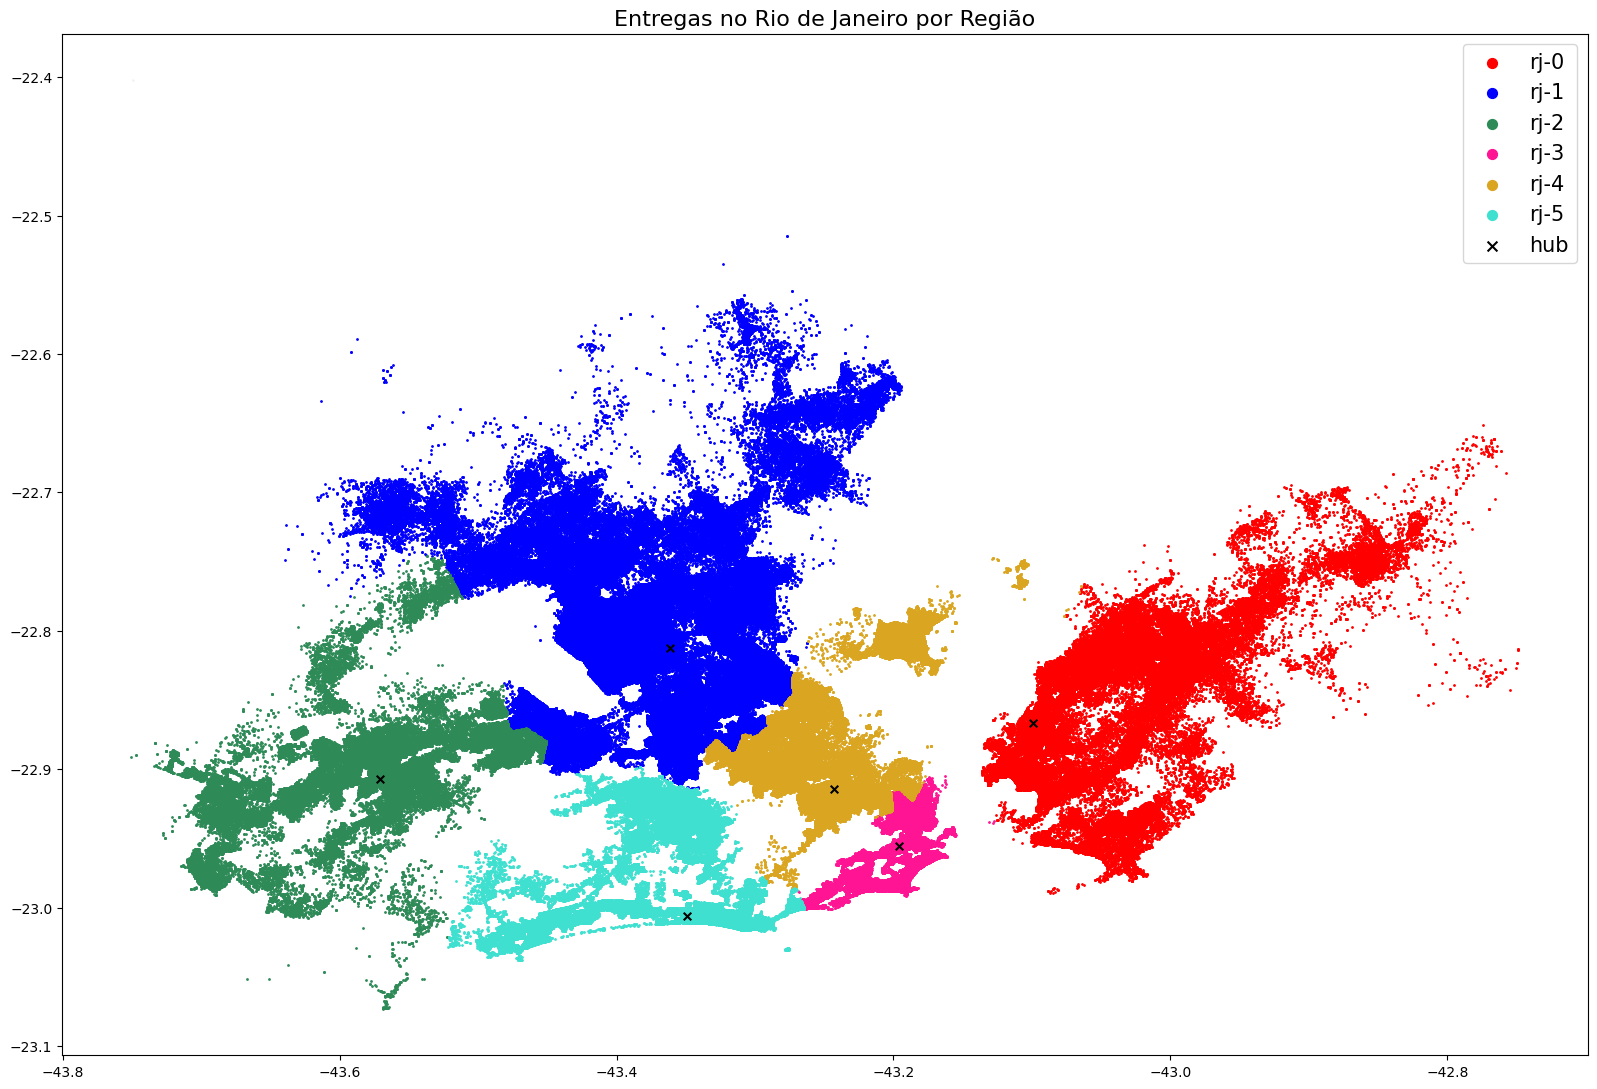

In [ ]:
import matplotlib.pyplot as plt

#criar plot vazio

fig, ax = plt.subplots(figsize = (50/2.54, 50/2.54))

#plot mapa do RJ
mapa.plot(ax=ax, alpha=0.4, color="lightgrey")

#plot das entregas
geo_dataframe_rj.query("region == 'rj-0' ").plot(ax=ax, markersize=1, color="red", label="rj-0")
geo_dataframe_rj.query("region == 'rj-1' ").plot(ax=ax, markersize=1, color="blue", label="rj-1")
geo_dataframe_rj.query("region == 'rj-2' ").plot(ax=ax, markersize=1, color="seagreen", label="rj-2")
geo_dataframe_rj.query("region == 'rj-3' ").plot(ax=ax, markersize=1, color="deeppink", label="rj-3")
geo_dataframe_rj.query("region == 'rj-4' ").plot(ax=ax, markersize=1, color="goldenrod", label="rj-4")
geo_dataframe_rj.query("region == 'rj-5' ").plot(ax=ax, markersize=1, color="turquoise", label="rj-5")

#plot dos hubs
geo_hub_rj.plot(ax=ax, markersize=30, marker="x", color="black", label="hub")

#plot da legenda
plt.title("Entregas no Rio de Janeiro por Região", fontdict={"fontsize": 16})
lgnd = plt.legend(prop={"size": 15})
for handle in lgnd.legendHandles:
  handle.set_sizes([50])

**Insights**

1. As entregas estão bem condensadas em cada região, com os hubs rj-3, rj-4 e rj-5 menos dispersos em relação aos hubs rj-0, rj-1 e rj-2.
2. Os hubs rj-0, rj-1 e rj-2, abrangem um território maior que os demais, o que pode gerar um tempo de entrega e número de demandas maior.

### Gráfico de entregas por região

<ipython-input-27-aaeae99ddfec>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  grafico = sns.barplot(data=data, x="region", y="region_percent", ci=None, palette="pastel")
<ipython-input-27-aaeae99ddfec>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafico = sns.barplot(data=data, x="region", y="region_percent", ci=None, palette="pastel")


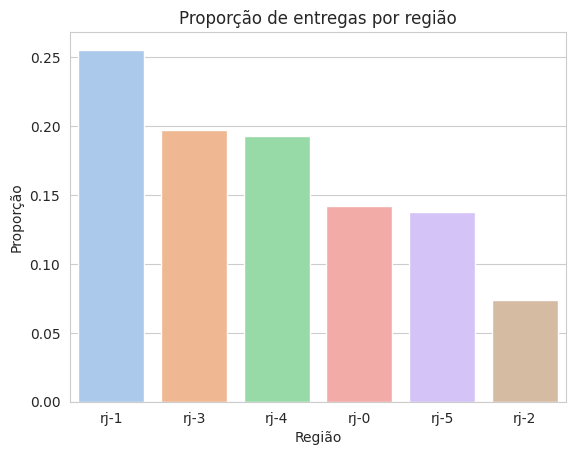

In [ ]:
data = pd.DataFrame(geo_dataframe_rj[["region", "vehicle_capacity"]].value_counts(normalize=True)).reset_index()
data.rename(columns={"proportion": "region_percent"},inplace=True)

import seaborn as sns

with sns.axes_style("whitegrid"):
  grafico = sns.barplot(data=data, x="region", y="region_percent", ci=None, palette="pastel")
  grafico.set(title="Proporção de entregas por região", xlabel="Região", ylabel="Proporção")

**Insights**

1. A distribuição está concentrada no hub rj-1;
2. Apesar de abranger um grande território, o hub rj-2 tem a menor demanda;

### Analisando distribuição de hubs com a densidade populacional do RJ

Importando base de dados com as informações do município e sua localização

In [ ]:
estados = pd.read_csv("https://raw.githubusercontent.com/kelvins/municipios-brasileiros/main/csv/estados.csv")
municipios = pd.read_csv("https://raw.githubusercontent.com/kelvins/municipios-brasileiros/main/csv/municipios.csv")

In [ ]:
municipios_por_estados = pd.merge(left=estados, right=municipios, on="codigo_uf")

In [ ]:
estado_rj = municipios_por_estados.query("uf == 'RJ'")
estado_rj = estado_rj[["nome_y", "latitude_y", "longitude_y"]].reset_index(drop=True).sort_values(by=["nome_y"])

Importando base de dados com as informações de população

**Estimativa de 2021**

In [ ]:
pop = pd.read_excel("/content/estimativa_dou_2021.xls",
                    sheet_name="Municípios",
                    skiprows=1
)

In [ ]:
pop_rj = pop.query("UF == 'RJ'").reset_index(drop=True).rename(
    columns={
        "NOME DO MUNICÍPIO": "nome_y"
    }
)

Juntando dataframes

In [ ]:
pop_lat_lon = pd.merge(left = pop_rj, right =estado_rj, on=["nome_y"] )

In [ ]:
pop_lat_lon = pop_lat_lon.drop(columns=["UF", "COD. UF", "COD. MUNIC"]).rename(
    columns={
        "nome_y": "Municipio",
        "POPULAÇÃO ESTIMADA": "População",
        "latitude_y": "Latitude",
        "longitude_y": "Longitude"
    }
).reset_index(drop=True)

Gerando mapa

In [ ]:
!pip install folium

In [ ]:
import geopandas as gpd
import pandas as pd
import folium
from folium.plugins import HeatMap, FastMarkerCluster

In [ ]:
# Criar um GeoDataFrame a partir dos dados de população
geometry = gpd.points_from_xy(pop_lat_lon.Longitude, pop_lat_lon.Latitude)
gdf = gpd.GeoDataFrame(pop_lat_lon, geometry=geometry)

In [ ]:
# Carregar o shapefile do Rio de Janeiro
rio_gdf = geopandas.read_file("rj.shp")

# Inicializar o mapa centrado no Rio de Janeiro
m = folium.Map(location=[-22.9068, -43.1729], zoom_start=8)

# Salvar o mapa como um arquivo HTML
m.save('mapa_de_calor_rio_de_janeiro.html')

# Criar a lista de dados para o HeatMap
heat_data = [[row["Latitude"], row["Longitude"], row["População"]] for index, row in pop_lat_lon.iterrows()]

# Adicionar o HeatMap ao mapa
HeatMap(heat_data).add_to(m)

# Exibir o mapa
m

**Insights**

1. Comparando o mapa que apresenta a densidade populacional do estado do Rio de Janeiro com o gráfico de distribuição dos hubs, podemos observar que a região contemplada pelos hubs rj-3, rj-4 e rj-5 estão bem localizados na área com uma maior concentração de pessoas, atendendo bem essas regiões;
2. O hub rj-1 concentra a maior parte das entregas, mas está localizado em uma área com uma densidade populacional menor que os do hub rj-3, rj-4 e rj-5. Para isso, seria interessante dividir o hub rj-1 para que a distribuição de veículos otimize a entrega e diminua a demanda nessa região